# Project 1 
## Web Scraping
### Getting information about laptops using staples.ca web page
#### Luis Dorantes

In [1]:
#import all libraries and pacjages needed
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import numpy as np
import pandas as pd


In [2]:
#Function that return array with laptop attributes
def get_laptop_attributes(url):
    '''return a list with laptops details such as processor, ram, os, screen size for url given...'''
    #Open a new Chrome page 
    driver = webdriver.Chrome('chromedriver.exe')
    driver.get(url)
    #Wait and close newsletter pop up
    try:
        element = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//*[@id="bold-welcome-modal"]/div/div/header/div/span[2]')))
        element.click()
    except:
        pass
    #Add name and price of laptop
    laptop = []
    laptop.append(driver.find_element(By.XPATH,'//*[@id="breadcrumbs_pdp"]/ol/li[5]/span[2]/span').text.split(',')[0])
    laptop.append(driver.find_element(By.CLASS_NAME,'product-form').text.split('\n')[0])
            
    #Add extra detals for comparison
    details = [row.text for row in driver.find_elements(By.XPATH,'//*[@id="product_description"]/div/ul')][0].split('\n')
    
    #Append detals to laptop list
    for i in range(len(details)):
        laptop.append(details[i])
    #close driver
    driver.close()
    #Return list with laptop details    
    return laptop

In [3]:
#Function to get number of pages 
def number_of_pages():
    '''return number of pages of laptop catalog'''
    #To run this function driver must be started first
    driver.get('https://www.staples.ca/collections/gaming-laptops-94')
    #Wait and close newsletter pop up
    try:
        element = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//*[@id="bold-welcome-modal"]/div/div/header/div/span[2]')))
        element.click()
    except:
        pass
    num_pages = driver.find_elements(By.CLASS_NAME,'ais-Pagination-link')
    page_list = [number.get_attribute('href') for number in num_pages]
    last_page = int(page_list[-1].split('&')[0].split('page=')[1])
    
    return last_page

In [4]:
#Function that move to new page and get all laptops url 
def move_next_page(page):
    '''move existing Chrome page to next browser page'''
    #page_ = page 
    driver.get(f'https://www.staples.ca/collections/gaming-laptops-94?page={page}')
    #Wait and close newsletter pop up
    try:
        element = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//*[@id="bold-welcome-modal"]/div/div/header/div/span[2]')))
        element.click()
    except:
        pass
    #get all url for laptop and return the list
    urls = driver.find_elements(By.CLASS_NAME,'product-thumbnail')
    urls_list = [url.find_element(By.TAG_NAME,'a').get_attribute('href') for url in urls]
    
    return urls_list

    

# __Main__ of script

In [6]:
#Start driver
driver = webdriver.Chrome('chromedriver.exe')
#Return number of pages and enter to staples laptop sale web page
pages = number_of_pages()

#Running thru. all pages, getting url for each laptop and bring back datasheet for each 
data_information = []
for page in range(pages):
    laptop_urls = move_next_page(page + 1)
    for url in laptop_urls:
        data_information.append(get_laptop_attributes(url))
        print(f'Page {page}: Datasheet has been Obtained')
        
    
    

In [11]:
# #Check of a given page
driver = webdriver.Chrome('chromedriver.exe')
data_information = []
page = 2
laptop_urls = move_next_page(page)
for url in laptop_urls:
    data_information.append(get_laptop_attributes(url))
    print(f'Page {page}: Datasheet has been Obtained')

<ipython-input-11-7c4a33899bbf>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')
<ipython-input-2-b3d2e54b04d0>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


Page 2: Datasheet has been Obtained
Page 2: Datasheet has been Obtained
Page 2: Datasheet has been Obtained
Page 2: Datasheet has been Obtained
Page 2: Datasheet has been Obtained
Page 2: Datasheet has been Obtained
Page 2: Datasheet has been Obtained
Page 2: Datasheet has been Obtained
Page 2: Datasheet has been Obtained
Page 2: Datasheet has been Obtained
Page 2: Datasheet has been Obtained
Page 2: Datasheet has been Obtained


In [103]:
#data_information

In [104]:
#len(data_information)

In [12]:
#Check numebr of atributes for each laptop paage
for i in range(len(data_information)):
    print(i,len(data_information[i]))

0 13
1 13
2 13
3 13
4 13
5 17
6 15
7 13
8 13
9 13
10 18
11 18


In [13]:
#df = pd.DataFrame(data_information, columns = ['name','price','screen','CPU','RAM','HDD/SDD','os_version','GPU','connectivity','ports','battery','dimensions','warranty'])
df = pd.DataFrame(data_information)

In [14]:
#Create a csv using pandas
df.to_csv('gaming2.csv',index = False)

# Data Analysis

In [3]:
import numpy as np
import pandas as pd

In [14]:
laptops = pd.read_csv('laptops.csv', header = 0)
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   description                548 non-null    object 
 1   brand                      548 non-null    object 
 2   price                      548 non-null    float64
 3   cpu                        548 non-null    object 
 4   cpu_family                 548 non-null    object 
 5   ram                        548 non-null    object 
 6   ram_size                   548 non-null    int64  
 7   storage                    543 non-null    object 
 8   storage_capacity_ssd_only  543 non-null    float64
 9   system                     548 non-null    object 
 10  screen                     546 non-null    object 
 11  screen_in                  546 non-null    float64
 12  GPU                        542 non-null    object 
 13  connectivity               540 non-null    object 

In [10]:
laptops.head()

,description,brand,price,cpu,cpu_family,ram,ram_size,storage,storage_capacity_ssd_only,system,screen,screen_in,GPU,connectivity,ports,battery,dimensions,warranty,warranty_years
0,"Dell Latitude 3310 2-in-1 13.3""Laptop",dell,1489.99,Processor: Intel Core i5 8th Gen i5-8265U 1.60...,intel core i5,Memory: 8GB,8,Hard Drive: 128GB SDD,128.0,windows 10,Screen Type and Size: 13.3 1920 x 1080 LCD,13.3,Graphics Coprocessor: Intel UHD Graphics 620,NaN,Ports: 2 x USB Type-A (USB 3.1 / USB 3.2 Gen 1...,Battery and Life: 4-Cell: 56 Wh Lithium-Ion Po...,NaN,1 Year Limited Manufacturer Warranty,1
1,"Microsoft 12.4"" Multi-Touch Surface Laptop Go",microsoft,979.99,1.0 GHz Intel Core i5 Quad-Core 10th Gen proce...,intel core i5,8GB LPDDR4x,8,256GB SSD storage,512.0,windows 10,"12.4"" 1536 x 1024 PixelSense Touchscreen",12.4,Integrated Intel UHD Graphics,NaN,"Ports: 3.5mm Headphone Jack, Surface Connect, ...",NaN,"Dimensions: 10.95"" x 8.1"" x 0.62""",1 Year Limited Warranty,1
2,"Microsoft 12.4"" Multi-Touch Surface Laptop Go",microsoft,979.99,1.0 GHz Intel Core i5 Quad-Core 10th Gen proce...,intel core i5,8GB LPDDR4x,8,256GB SSD storage,512.0,windows 10,"12.4"" 1536 x 1024 PixelSense Touchscreen",12.4,Integrated Intel UHD Graphics,"Wi-Fi 6 (802.11ax), Bluetooth 5.0","Ports: 3.5mm Headphone Jack, Surface Connect, ...",NaN,"Dimensions: 10.95"" x 8.1"" x 0.62""",1 Year Limited Warranty,1
3,"ASUS Zenbook UX582LR-XS94T 15.6"" Laptop",asus,3999.99,2.4 GHz Intel Core i9-10980HK 8-Cores,intel core i9,32GB DDR4,32,1TB PCIe SSD,1024.0,windows 10,"15.6"" 4K UHD Touch Screen, 3840 x 2160 Resolution",15.6,NVIDIA GeForce RTX 3070 8GB GDDR6,"Wi-Fi 6(802.11ax), Bluetooth 5.0 (Dual band) 2...",NaN,NaN,NaN,NaN,NaN
4,Lenovo ThinkStation P340 Tiny,lenovo,2209.99,Intel Core i7-10700T processor,intel core i7,16GB SO-DIMM DDR4-2933 Non-ECC memory,16,512GB SSD M.2 2280 PCIe NVMe Opal storage,512.0,windows 10,NaN,NaN,"Intel UHD Graphics 630, NVIDIA Quadro P1000 4GB","Connectivity: Intel AX201 11ax, 2x2 + Bluetoot...",Ports: Headphone / microphone combo jack (3.5m...,NaN,"Dimensions: 1.5""H x 7.2""W x 7""D, 3lbs",3 Year Limited Manufacturer Warranty,3


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

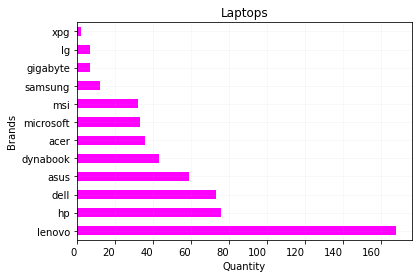

In [33]:
brands = laptops['brand'].value_counts()
brands.plot(kind='barh', title='Laptops', color = 'magenta')
plt.grid(alpha=0.1)
plt.xticks(rotation=0, ha='right')
plt.xlabel('Quantity')
plt.ylabel('Brands');

In [31]:
brandsdf = pd.DataFrame(brands)
brandsdf

,brand
lenovo,168
hp,76
dell,73
asus,59
dynabook,43
acer,36
microsoft,33
msi,32
samsung,12
gigabyte,7


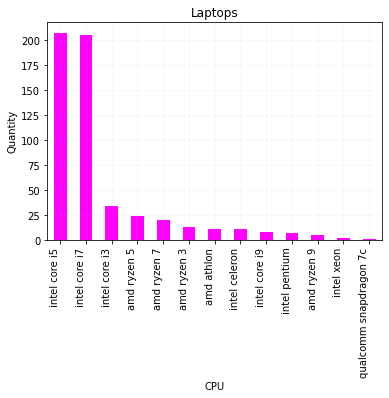

In [48]:
brands = laptops['cpu_family'].value_counts()
brands.plot(kind='bar', title='Laptops', color = 'magenta')
plt.grid(alpha=0.1)
plt.xticks(rotation=90, ha='right')
plt.xlabel('CPU')
plt.ylabel('Quantity');

Text(0, 0.5, 'Price of laptops')

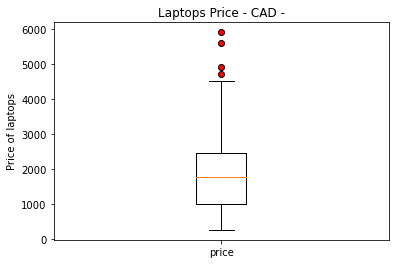

In [42]:
red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(laptops['price'], flierprops=red_circle)
plt.title('Laptops Price - CAD -')
plt.xticks([1], ['price'])
plt.ylabel('Price of laptops')

In [43]:
import seaborn as sns

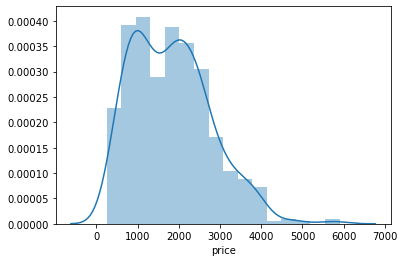

In [44]:
sns.distplot(laptops['price']);

Text(0, 0.5, 'price')

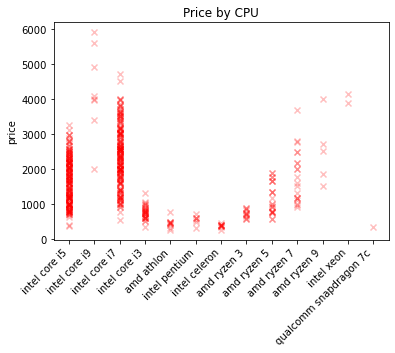

In [60]:
price = laptops['price']
cpu_family = laptops['cpu_family']
plt.scatter(cpu_family, price, marker='x', c=['r'], alpha=0.25)
plt.title('Price by CPU')
plt.xticks(rotation=45, ha='right')
plt.ylabel('price')

Text(0, 0.5, 'price')

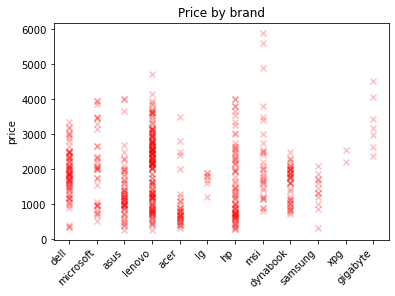

In [59]:
brands_ = laptops['brand']
plt.scatter(brands_, price, marker='x', c=['r'], alpha=0.25, label='Cats')
plt.title('Price by brand')
plt.xticks(rotation=45, ha='right')
plt.ylabel('price')

In [72]:
laptops_by_brand = pd.DataFrame(laptops.groupby('brand')['price'].aggregate(['min', np.median, max,np.std]))
laptops_by_brand

,min,median,max,std
brand,,,,
acer,329.99,724.98,3499.99,734.431012
asus,259.99,1199.99,3999.99,793.178031
dell,339.99,1869.99,3349.99,647.399357
dynabook,719.99,1749.99,2479.99,495.150933
gigabyte,2369.99,3169.99,4519.99,769.043933
hp,299.97,1224.99,3999.99,1041.802857
lenovo,249.99,2224.99,4719.99,942.589506
lg,1199.99,1799.99,1899.99,244.948974
microsoft,519.99,2049.99,3949.99,1049.777301


In [71]:
laptops_by_brand = pd.DataFrame(laptops.groupby('cpu_family')['price'].aggregate(['min', np.median, max, np.std]))
laptops_by_brand

,min,median,max,std
cpu_family,,,,
amd athlon,249.99,449.970,749.00,126.373225
amd ryzen 3,549.98,699.990,869.99,112.593278
amd ryzen 5,549.97,999.990,1869.99,437.661834
amd ryzen 7,899.99,1674.495,3674.00,755.632953
amd ryzen 9,1499.99,2499.990,3999.99,963.497222
intel celeron,259.99,397.970,449.99,49.943889
intel core i3,339.99,754.990,1299.99,187.473948
intel core i5,355.99,1669.000,3259.00,629.050138
intel core i7,529.97,2349.990,4719.99,835.166792


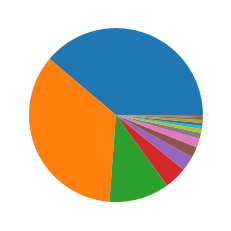

In [83]:
screens = laptops['screen_in'].value_counts()
sizes = pd.unique(laptops['screen_in'])
plt.pie(screens)#, labels = list(sizes), startangle = 90)
plt.show() 


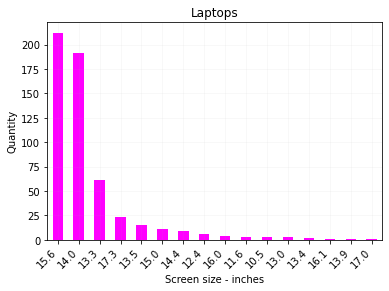

In [94]:
screens = laptops['screen_in'].value_counts()
screens.plot(kind='bar', title='Laptops', color = 'magenta')
plt.grid(alpha=0.1)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Screen size - inches')
plt.ylabel('Quantity');

Text(0, 0.5, 'SSD - GB')

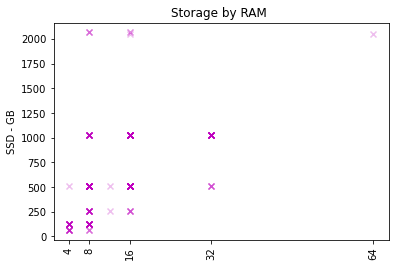

In [92]:
ram = laptops['ram_size']
storage = laptops['storage_capacity_ssd_only']
plt.scatter(ram, storage, marker='x', c=['m'], alpha=0.25)
plt.title('Storage by RAM ')
plt.xticks([4,8,16,32,64],rotation=90, ha='center')
plt.ylabel('SSD - GB')

In [95]:
laptops['price'].mean()

1821.5738138686065

In [98]:
laptops['price'].median

<bound method Series.median of 0      1489.99
1       979.99
2       979.99
3      3999.99
4      2209.99
        ...   
543    1999.99
544    1999.99
545    2099.99
546    2749.99
547    2999.99
Name: price, Length: 548, dtype: float64>